# <center>L2 Computational Physics</center>
---
## Week 4: Differential Equations II

In this notebook, you will write a program to study the trajectory of a spherical, iron cannonball in the presence of gravity and drag forces. 

In [2]:
import numpy
from matplotlib import pyplot as plt

In [3]:
# Define all constants to be used in the simulation
r_cb = 0.15  # Radius of cannonball in m
rho_iron = 7874  # Density of iron in kg/m^3
g = 9.81  # Acceleration due to gravity in m/s^2
kappa = 0.47  # Drag coefficient of a sphere
rho_air = 1.23  # Density of air in kg/m^3
v0 = 125.00  # Initial speed in m/s

From this information, calculate the following two variables:

In [4]:
def get_area(r):
    ''' 
    This function returns the cross section area of a sphere of radius r. The returned 
    value is in the squared units of the unit of the radius argument.
    '''
    # YOUR CODE HERE
    return numpy.pi*(r**2)

def get_mass(r):
    ''' 
    This function returns the mass of an iron sphere of radius r. The radius 
    should be given in meter and the return value is in kg.
    '''
    # YOUR CODE HERE
    return (4/3)*numpy.pi*(r**3)*rho_iron

area_cb = get_area(r_cb)
mass_cb = get_mass(r_cb)

In [5]:
# these tests are worth one mark
assert numpy.isclose(area_cb, 0.07068583470577035)
assert numpy.isclose(mass_cb, 111.31605249464711)

## The Differential Equations

Create a function `f` which calculates the right-hand side of the differential equation

$$ \frac{d}{dt}\left(\begin{array}{c}x\\y\\v_x \\v_y \end{array}\right) = f(x, y, v_x, v_y, t)$$

such that the differential equation represents the cannonball's motion as it moves through the air. 

- *Your function should accept two arguments:*
    - `r` *- a numpy array representing the cannonball's state, $(x, y, v_{x}, v_{y})$.*
    - `t` *- Time * 
    
- *The drag force experienced by the cannonball is given by $$\vec{F}_{\textrm{d}} = - \frac{1}{2} C_{\textrm{d}} \rho |\vec{v}|^{2} A \widehat{v}~,$$ where $\widehat{v}$ is a unit vector pointing in the direction of the cannonball's instantaneous velocity.*

In [6]:
def f(r, t):
    '''Implements differential equation for cannonball from state vector r and time t'''
    
    # Unpack array of the state
    x, y, vx, vy = r
    
    # these variables should updated in your code to be the derivatives of 
    # the x, y positions and the derivative of the x, y velocities. 
    dx_dt, dy_dt, dvx_dt, dvy_dt = 0, 0, 0, 0
    
    # YOUR CODE HERE
    
    dvx_dt = -(1/2)*kappa*rho_air*area_cb*(1/mass_cb)*(((vx**2)+(vy**2))**(1/2))*vx
    dvy_dt = -(1/2)*kappa*rho_air*area_cb*(1/mass_cb)*(((vx**2)+(vy**2))**(1/2))*vy-g
    
    dx_dt = vx
    dy_dt = vy
    
    return numpy.array([dx_dt, dy_dt, dvx_dt, dvy_dt])
    

Check your result:

In [7]:
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
assert len(f(r_test, 0))== 4

In [8]:
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
assert numpy.isclose(f(r_test, 0), [ 88.38834765,  88.38834765,  -2.0279283 , -11.8379283 ]).all()

## Solving the Differential Equations

Create the function `solve_euler(state_initial, t1, n_panels)` which solves the differential equations using Euler's method.

- `state_initial` *is a numpy array containing the initial conditions $(x_{0}, y_{0}, v_{x0}, v_{y0})$*
- *When working with a numpy array, you can use the same commands as those used for single variables - for instance,* `state += f(state, t)`.
- *This function should record all state values at each timepoint in the variable `history` and return it. This will be similar to last week, only this time you will have to populate a 2D array.* 


In [9]:
def solve_euler(state_initial, t1, n_steps):
    '''Solves ODE using Euler's method from state_initial to end time t1 using n_panels panels'''
    # Define array for trajectory history
    history = numpy.empty((n_steps+1,4))  # Number of columns is equal to number of variables to solve for (4)
    history[0] = state_initial
    # you should now populate the history array
    # YOUR CODE HERE
    for i in range (1, n_steps +1):
        history[i] = history[i-1] + ((t1/n_steps)*f(history[i-1], (0 + (i*(t1/n_steps)))))
    return history


Test your solution:

In [10]:
# this test is worth 4 marks
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
assert numpy.isclose(solve_euler(r_test, 25.0, 10), numpy.array(
    [[   0.        ,    0.        ,   88.38834765,   88.38834765],
     [ 220.97086912,  220.97086912,   83.3185269 ,   58.7935269 ],
     [ 429.26718637,  367.95468637,   79.41984538,   31.51743125],
     [ 627.81679983,  446.7482645 ,   76.30595276,    5.75669607],
     [ 818.58168171,  461.14000469,   73.62655732,  -18.97044366],
     [1002.64807501,  413.71389553,   71.05785323,  -42.83359748],
     [1180.2927081 ,  306.62990184,   68.35253688,  -65.72783569],
     [1351.1740503 ,  142.31031262,   65.37829955,  -87.3928075 ],
     [1514.61979917,  -76.17170612,   62.10406078, -107.54105068],
     [1669.87995113, -345.02433282,   58.56508321, -125.93786257],
     [1816.29265915, -659.86898925,   54.83262575, -142.43661744]])).all()

## Finding the range

To find the range of the projectile we will look for the $x$ coordinate when the trajectory crosses the $y=0$ line. In most cases that point will not be one of the steps but will be between two steps. We will use a linear approximation to determine this point given the last point with a positive $y$ value and the first point with a negative $y$ value. Implement the function `find_zero_linear` that takes as argument the two values of $x$ `x1` and `x2` and the heights `y1` and `y2` and returns the value of $x$ at which the line between $(x_1,y_1)$ and $x_2,y_2$ crosses the $y=0$ line.  

In [11]:
def find_zero_linear(x1, x2, y1, y2):
    if y1*y2 > 0:
        print("I expect y1 and y2 to have opposite signs!")
    # YOUR CODE HERE
    x = x1 - ((y1)/(y1-y2))*(x1-x2)
    return x

In [12]:
# these tests are worth 2 marks
assert numpy.isclose(find_zero_linear(-1,1,3,-3),0.0)
assert numpy.isclose(find_zero_linear(-1,1,1,-3), -0.5)

Given the function above we can define a function to determine the range. (Don't modify it!)

In [13]:
def find_range(history):
    all_xs = history[:,0]
    all_ys = history[:,1]
    negatives = numpy.argwhere(all_ys<0)
    if len(negatives) == 0 :
        print ("The projectile did not touch down! Returning the last known location")
        return all_xs[-1]
    (index,) = negatives[0]
    y1, y2 = all_ys[index-1], all_ys[index]
    x1, x2 = all_xs[index -1], all_xs[index]
    return find_zero_linear(x1,x2,y1,y2)

In [14]:
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
h = solve_euler(r_test, 25.0, 10000)
assert numpy.isclose(find_range(h),1306.2541)

## Plotting task

Create a plot to show the trajectories for different values of the initial angle. Use the same velocity $v0=125\rm{m/s}$ for all angles. The plot should have axis labels and a title. [4 marks]


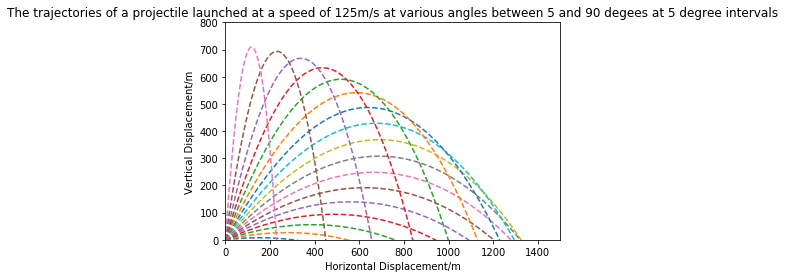

In [15]:
n_steps = 1000
thetas = range(5, 90, 5) # the angles in degrees

ic1 = [0, 0, (125)*(numpy.cos((5/360)*(2*numpy.pi))), (125)*(numpy.sin((5/360)*(2*numpy.pi)))]
ic2 = [0, 0, (125)*(numpy.cos((10/360)*(2*numpy.pi))), (125)*(numpy.sin((10/360)*(2*numpy.pi)))]
ic3 = [0, 0, (125)*(numpy.cos((15/360)*(2*numpy.pi))), (125)*(numpy.sin((15/360)*(2*numpy.pi)))]
ic4 = [0, 0, (125)*(numpy.cos((20/360)*(2*numpy.pi))), (125)*(numpy.sin((20/360)*(2*numpy.pi)))]
ic5 = [0, 0, (125)*(numpy.cos((25/360)*(2*numpy.pi))), (125)*(numpy.sin((25/360)*(2*numpy.pi)))]
ic6 = [0, 0, (125)*(numpy.cos((30/360)*(2*numpy.pi))), (125)*(numpy.sin((30/360)*(2*numpy.pi)))]
ic7 = [0, 0, (125)*(numpy.cos((35/360)*(2*numpy.pi))), (125)*(numpy.sin((35/360)*(2*numpy.pi)))]
ic8 = [0, 0, (125)*(numpy.cos((40/360)*(2*numpy.pi))), (125)*(numpy.sin((40/360)*(2*numpy.pi)))]
ic9 = [0, 0, (125)*(numpy.cos((45/360)*(2*numpy.pi))), (125)*(numpy.sin((45/360)*(2*numpy.pi)))]
ic10 = [0, 0, (125)*(numpy.cos((50/360)*(2*numpy.pi))), (125)*(numpy.sin((50/360)*(2*numpy.pi)))]
ic11 = [0, 0, (125)*(numpy.cos((55/360)*(2*numpy.pi))), (125)*(numpy.sin((55/360)*(2*numpy.pi)))]
ic12 = [0, 0, (125)*(numpy.cos((60/360)*(2*numpy.pi))), (125)*(numpy.sin((60/360)*(2*numpy.pi)))]
ic13 = [0, 0, (125)*(numpy.cos((65/360)*(2*numpy.pi))), (125)*(numpy.sin((65/360)*(2*numpy.pi)))]
ic14 = [0, 0, (125)*(numpy.cos((70/360)*(2*numpy.pi))), (125)*(numpy.sin((70/360)*(2*numpy.pi)))]
ic15 = [0, 0, (125)*(numpy.cos((75/360)*(2*numpy.pi))), (125)*(numpy.sin((75/360)*(2*numpy.pi)))]
ic16 = [0, 0, (125)*(numpy.cos((80/360)*(2*numpy.pi))), (125)*(numpy.sin((80/360)*(2*numpy.pi)))]
ic17 = [0, 0, (125)*(numpy.cos((85/360)*(2*numpy.pi))), (125)*(numpy.sin((85/360)*(2*numpy.pi)))]

ve1 = solve_euler(ic1, 300, n_steps)
ve2 = solve_euler(ic2, 300, n_steps)
ve3 = solve_euler(ic3, 300, n_steps)
ve4 = solve_euler(ic4, 300, n_steps)
ve5 = solve_euler(ic5, 300, n_steps)
ve6 = solve_euler(ic6, 300, n_steps)
ve7 = solve_euler(ic7, 300, n_steps)
ve8 = solve_euler(ic8, 300, n_steps)
ve9 = solve_euler(ic9, 300, n_steps)
ve10 = solve_euler(ic10, 300, n_steps)
ve11 = solve_euler(ic11, 300, n_steps)
ve12 = solve_euler(ic12, 300, n_steps)
ve13 = solve_euler(ic13, 300, n_steps)
ve14 = solve_euler(ic14, 300, n_steps)
ve15 = solve_euler(ic15, 300, n_steps)
ve16 = solve_euler(ic16, 300, n_steps)
ve17 = solve_euler(ic17, 300, n_steps)

xs_euler1, ys_euler1 = ve1[:,0], ve1[:,1]
xs_euler2, ys_euler2 = ve2[:,0], ve2[:,1]
xs_euler3, ys_euler3 = ve3[:,0], ve3[:,1]
xs_euler4, ys_euler4 = ve4[:,0], ve4[:,1]
xs_euler5, ys_euler5 = ve5[:,0], ve5[:,1]
xs_euler6, ys_euler6 = ve6[:,0], ve6[:,1]
xs_euler7, ys_euler7 = ve7[:,0], ve7[:,1]
xs_euler8, ys_euler8 = ve8[:,0], ve8[:,1]
xs_euler9, ys_euler9 = ve9[:,0], ve9[:,1]
xs_euler10, ys_euler10 = ve10[:,0], ve10[:,1]
xs_euler11, ys_euler11 = ve11[:,0], ve11[:,1]
xs_euler12, ys_euler12 = ve12[:,0], ve12[:,1]
xs_euler13, ys_euler13 = ve13[:,0], ve13[:,1]
xs_euler14, ys_euler14 = ve14[:,0], ve14[:,1]
xs_euler15, ys_euler15 = ve15[:,0], ve15[:,1]
xs_euler16, ys_euler16 = ve16[:,0], ve16[:,1]
xs_euler17, ys_euler17 = ve17[:,0], ve17[:,1]

plt.plot(xs_euler1, ys_euler1, linestyle='--')
plt.plot(xs_euler2, ys_euler2, linestyle='--')
plt.plot(xs_euler3, ys_euler3, linestyle='--')
plt.plot(xs_euler4, ys_euler4, linestyle='--')
plt.plot(xs_euler5, ys_euler5, linestyle='--')
plt.plot(xs_euler6, ys_euler6, linestyle='--')
plt.plot(xs_euler7, ys_euler7, linestyle='--')
plt.plot(xs_euler8, ys_euler8, linestyle='--')
plt.plot(xs_euler9, ys_euler9, linestyle='--')
plt.plot(xs_euler10, ys_euler10, linestyle='--')
plt.plot(xs_euler11, ys_euler11, linestyle='--')
plt.plot(xs_euler12, ys_euler12, linestyle='--')
plt.plot(xs_euler13, ys_euler13, linestyle='--')
plt.plot(xs_euler14, ys_euler14, linestyle='--')
plt.plot(xs_euler15, ys_euler15, linestyle='--')
plt.plot(xs_euler16, ys_euler16, linestyle='--')
plt.plot(xs_euler17, ys_euler17, linestyle='--')

plt.xlabel('Horizontal Displacement/m')
plt.ylabel('Vertical Displacement/m')
plt.title('The trajectories of a projectile launched at a speed of 125m/s at various angles between 5 and 90 degees at 5 degree intervals')
plt.xlim(0,1500)
plt.ylim(0,800);

Create a plot to show the range for different values of the initial velocity. Use the same angle $\theta=60^\circ$ for all velocities. The plot should have axis labels and a title and legend. Produce one curve with and one curve without the effect of air resistance. [5 marks]


In [29]:
n_steps = 1000
max_time = 300
v0s = numpy.linspace(50, 1000, 20)

initial = numpy.array([0, 0, (1/2)*v0s, (numpy.sqrt(3)/2)*v0s])

yvalues = numpy.zeros(20)
ystart = numpy.zeros(20)

for i in range (1, len(initial)+1):
    ystart[i] = solve_euler(initial[1, 1, i, i], max_time, n_steps)

print (ystart)

xvalues = v0s
ranges = []
ranges_noresistance = []
theta = numpy.deg2rad(60)

# Your code here


ValueError: setting an array element with a sequence.